In [15]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import noisereduce as nr
import seaborn as sns

In [16]:
'''
Use a binary approach to separate emotions from the dataset into calm and uncalm.
'''
data = []
# 71.21%
calm_emotion = ['hap', 'neu']
uncalm_emotion = ['ang', 'sad', 'fru', 'fea', 'dis', 'oth', 'xxx', 'exc', 'sur']


In [17]:
'''
Use a file reader to read the text file in database which includes emotion of each sentence of the dialog,
and categorize it by the sentiment category from the previous list.
'''
info = re.compile(r'\[.+\]\n', re.IGNORECASE)
# for session in range(1, 6):
for session in [1]:
    file_dir = f'/Users/apple/Desktop/UNSW 2022 T2/COMP9444/Project/code/speech emotion recognition/our-speech-emotion-recognition/code/IEMOCAP_full_release/Session{session}/dialog/EmoEvaluation/'
    files = [file for file in os.listdir(file_dir) if 'Ses' in file]

for file in files:
    with open(file_dir + file) as f:
        file_content = f.read()
    
    lines = re.findall(info, file_content)
    for line in lines[1:]:
        time, wav_filename, emo, val_act_dom = line.strip().split('\t')
        start, end = time[1:-1].split(' - ')
        val, act, dom = val_act_dom[1:-1].split(', ')
        if emo in calm_emotion:
            emotion = 'calm'
        else:
            emotion = 'uncalm'
        data.append([start, end, wav_filename, emotion, val, act, dom])

df_data = pd.DataFrame(data, columns = ['start_time', 'end_time', 'wav_filename', 'emotion', 'val', 'act', 'dom'])
df_data.to_csv('/Users/apple/Desktop/UNSW 2022 T2/COMP9444/9444Project/zhiqing/df_data.csv')

In [18]:
'''
Use file reader to store audio file route in filename_list,
and corresponding emotion in emotion_list
'''
filename_list = []
emotion_list = []
filename_dir = '/Users/apple/Desktop/UNSW 2022 T2/COMP9444/Project/code/speech emotion recognition/our-speech-emotion-recognition/code/IEMOCAP_full_release/Session1/sentences/wav'
data_df = pd.read_csv('/Users/apple/Desktop/UNSW 2022 T2/COMP9444/9444Project/zhiqing/df_data.csv')
emotion_column = data_df.emotion
filename_column = data_df.wav_filename

for file in filename_column:
    dirname = file[:-5]
    filename = f"{filename_dir}/{dirname}/{file}.wav"
    filename_list.append(filename)
  
for emotion in emotion_column:
    emotion_list.append(emotion)

In [19]:
# feature extraction function, which uses melspectrogram in librosa package to extract audio feature
def extract_audio_features(wav, sample_rate, mfcc, chroma, mel):
  result = np.array([])
  mel = np.mean(librosa.feature.melspectrogram(y = wav, sr = sample_rate).T, axis = 0)
  result = np.hstack((result, mel))
  return result

'''
For each audio file, use audio load function in librosa to obtain wav and simple rate,
reduce_noise function in noisereduce package to reduce noise,
load wav and sample rate in extract_audio_features funtion to extract feature from eact audio, 
add each of them in list a
'''
a,b = [], []
for file in filename_list:
    y, sr = librosa.load(file, sr = 16000)
    y_trim, _ = librosa.effects.trim(y, top_db = 20) # trim leading/trailing silence
    reduced_noise = nr.reduce_noise(y = y_trim, sr = sr) # noice reduction
    feature = extract_audio_features(reduced_noise, sr, True, True, True)
    a.append(feature)
    
'''
For each corresponding emotion, add each of them in list b
'''
for emotion in emotion_list:
    b.append(emotion)

# MultiLabeBinarizer
b = MultiLabelBinarizer().fit_transform(b)

'''
Use train_test_splite function in sklearn function to separate train set and test set
'''
train_data, test_data, train_labels, test_labels = train_test_split(a, b, test_size = 0.25, random_state = 9)

In [20]:
# Define a function to get confusion matrix
def get_confusion_matrix(confusion_matrix, axes, class_names):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    axes.set_xlabel('Predicted label')
    axes.set_ylabel('True label')

Iteration 1, loss = 4.49321796
Iteration 2, loss = 3.67433728
Iteration 3, loss = 2.87607840
Iteration 4, loss = 2.34302091
Iteration 5, loss = 2.05392391
Iteration 6, loss = 1.89881425
Iteration 7, loss = 1.81042558
Iteration 8, loss = 1.75953359
Iteration 9, loss = 1.72795008
Iteration 10, loss = 1.70582028
Iteration 11, loss = 1.68894130
Iteration 12, loss = 1.67526126
Iteration 13, loss = 1.66411594
Iteration 14, loss = 1.65394137
Iteration 15, loss = 1.64366834
Iteration 16, loss = 1.63393254
Iteration 17, loss = 1.62538694
Iteration 18, loss = 1.62054048
Iteration 19, loss = 1.61079589
Iteration 20, loss = 1.60400275
Iteration 21, loss = 1.59759369
Iteration 22, loss = 1.59105783
Iteration 23, loss = 1.58382850
Iteration 24, loss = 1.57684198
Iteration 25, loss = 1.57050386
Iteration 26, loss = 1.56376838
Iteration 27, loss = 1.56073132
Iteration 28, loss = 1.55253310
Iteration 29, loss = 1.54531559
Iteration 30, loss = 1.54017654
Iteration 31, loss = 1.53360549
Iteration 32, los

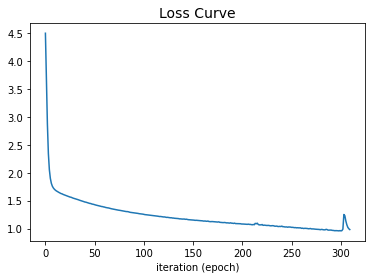


----------------------------------------------------
 Classification Report about accuracy on test data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00       455
           3       1.00      1.00      1.00       455
           4       0.73      0.97      0.83       327
           5       0.73      0.97      0.83       327

   micro avg       0.91      0.99      0.95      2474
   macro avg       0.91      0.99      0.94      2474
weighted avg       0.93      0.99      0.96      2474
 samples avg       0.91      0.99      0.94      2474



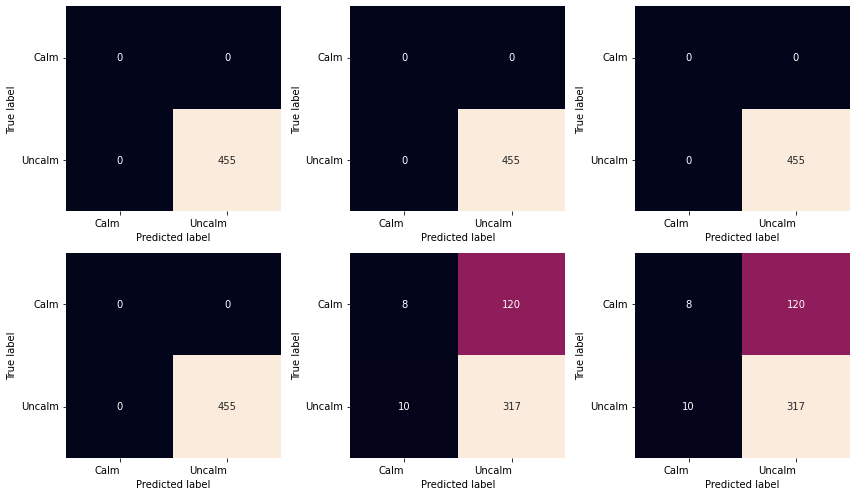

In [21]:
# set and train MLP model
model = MLPClassifier(solver='adam', alpha=0.13, batch_size=16, epsilon=1e-01, hidden_layer_sizes=(50, 30, 10), 
                        random_state=1, learning_rate='adaptive', learning_rate_init=0.001, max_iter=450, 
                        verbose=True, early_stopping=False)
model.fit(train_data, train_labels)

# get prediction from MLP model
test_predictions = model.predict(test_data)

# print accuracy scores
train_score = model.score(train_data, train_labels) * 100
test_score = model.score(test_data, test_labels) * 100
print(f"Train accuracy = {train_score:.2f}%")
print(f"Test accuracy = {test_score:.2f}%")
print(f"Loss = {model.loss_:.2f}%")

plt.plot(model.loss_curve_, label = 'Loss Curve')
plt.title("Loss Curve", fontsize = 14)
plt.xlabel("iteration (epoch)")
plt.show()

# print classification report
print(f'\n----------------------------------------------------\n Classification Report about accuracy on test data \n')
print(classification_report(test_labels, test_predictions))

matrix = multilabel_confusion_matrix(test_labels, test_predictions)

# plot confusion matrix
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
for axes, c_matrix in zip(ax.flatten(), matrix):
    get_confusion_matrix(c_matrix, axes, ["Calm", "Uncalm"])
fig.tight_layout()
plt.show()

Based on confusion matrix, the MLP model performs well on uncalm category and bad on calm category, the one of main reason is the data set for calm is much smaller than uncalm dataset. Besides, the train accuracy and test accuracy shows that the MLP model is under-fiiting because it does not perform well on both train set and train set(around 70% accuracy).